# Simple Notebook to check that Bayesian linear model working correctly

Do this by eyeballing output and checking it via that of Scikit-Learns implementation.

In [1]:
import pickle
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

## First Via Sklearn

In [2]:
from sklearn import linear_model

In [3]:

def y_np(x):
    return 5*x + 2*x*np.sin(x) 


In [4]:
x = 5 * np.random.randn(5)[:, None]
y = y_np(x)

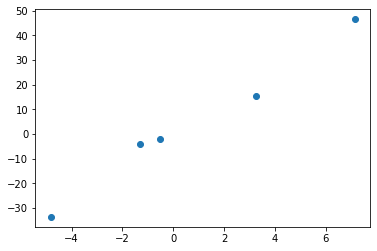

In [5]:
plt.plot(x,y,'o')

In [6]:
x_lin = np.linspace(np.min(x)-0.5, np.max(x)+0.5, 100)[:, None]

In [7]:
clf = linear_model.BayesianRidge(compute_score=True, fit_intercept=False)
clf.fit(x, y[:,0])

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None, compute_score=True,
              copy_X=True, fit_intercept=False, lambda_1=1e-06, lambda_2=1e-06,
              lambda_init=None, n_iter=300, normalize=False, tol=0.001,
              verbose=False)

In [8]:
y_sklearn_mn, y_sklearn_std = clf.predict(x_lin, return_std=True)

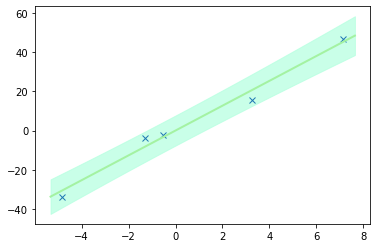

In [9]:
f, ax = plt.subplots()

ax.plot(x,y,'x')
ax.fill_between(x_lin[:, 0], y_sklearn_mn + 2*y_sklearn_std, y_sklearn_mn - 2*y_sklearn_std, color='#b3ffdf', alpha=0.7)
ax.plot(x_lin, y_sklearn_mn, label='mean', lw=2, color='#a4f2a2')

In [10]:
clf.lambda_

0.024902440155773798

In [11]:
clf.alpha_


0.06837856430354415

In [12]:
## Now via our implementation

In [13]:
import sys
sys.path.append('../')


In [14]:
from bayes_vs import bayes_models

In [15]:
embed = lambda x: x
embed.fp_dim = 1

bayes_ridge = bayes_models.BayesianRegression(embed, fit_mean=False)


In [16]:
import torch

In [17]:
bayes_ridge.fit(torch.tensor(x), torch.tensor(y))

Setting hyperparameters to 0.024902440155773798 and 0.06837856430354415


In [18]:
y_mvn = bayes_ridge.predict(torch.tensor(x_lin))

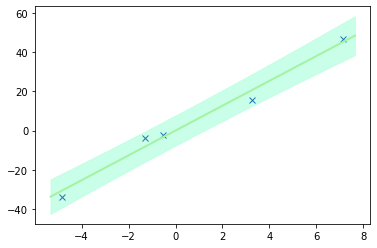

In [19]:
f, ax = plt.subplots()

ax.plot(x,y,'x')
mn = y_mvn.mean.numpy()
std = torch.sqrt(torch.diag(y_mvn.covariance_matrix)).numpy()
ax.fill_between(x_lin[:, 0], mn + 2*std, mn - 2*std, color='#b3ffdf', alpha=0.7)
ax.plot(x_lin, mn, label='mean', lw=2, color='#a4f2a2')


In [20]:
bayes_ridge.m

tensor([[6.3237]], dtype=torch.float64)

In [21]:
bayes_ridge.K

tensor([[5.9757]], dtype=torch.float64)

## Compare the coefficients found:

In [22]:
clf.coef_, bayes_ridge.m

(array([6.32372157]), tensor([[6.3237]], dtype=torch.float64))

In [23]:
clf.sigma_, 1/bayes_ridge.K

(array([[0.16734428]]), tensor([[0.1673]], dtype=torch.float64))